# Load Dataset

In [1]:
import sys
sys.path.append("../")

%load_ext autoreload
%autoreload 2

In [2]:
from datasets import load_dataset

filename = "../data/news-docs.2020.processed.csv"
dataset = load_dataset('csv', data_files=filename, column_names=["date", "sentenceSplit", "unsplit"])

Using custom data configuration default-a631fcd5c80eb05a
Reusing dataset csv (/home/sri/.cache/huggingface/datasets/csv/default-a631fcd5c80eb05a/0.0.0/2dc6629a9ff6b5697d82c25b73731dd440507a69cbce8b425db50b751e8fcfd0)


In [3]:
n = 100
sample_articles_list = [dataset['train'][i]['sentenceSplit'] for i in range(1, n)]

In [4]:
for article in sample_articles_list:
    for sentence in article.split('. '):
        if ' rit' in sentence:
            print(sentence)

Sharpton's event on Monday, an annual rite of passage for city and state leaders.
The candidates, Scott M


# Top K Experiment
+ Run the Gpt text generation on the dataset and observe at each timestep where the words are ranked on top k by the GPT model using their probabilites.

## More granularly
+ Transform the dataset into articles and use the passage of articles as model input.
+ Using the GPT model predict the next probable token at each timestep in the input sequence.
+ At each time-step, rank the predicted token based on the generated probability.
+ for each prediction at each timestep, compare where the original token is present in the ranked predicted token list. 

In [25]:
from src.insights import topk_insight

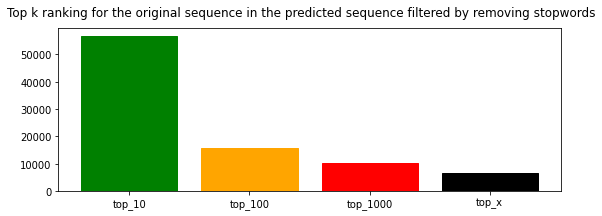

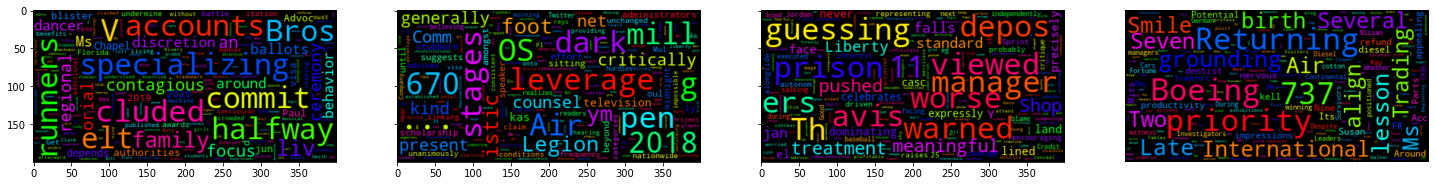

In [22]:
topk_insight.analyse_text(sample_articles_list, filters=None)

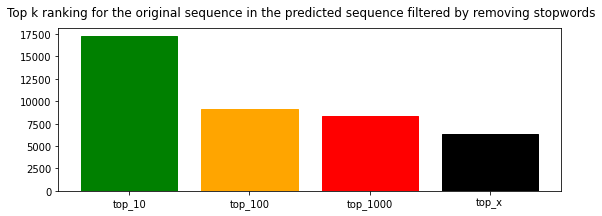

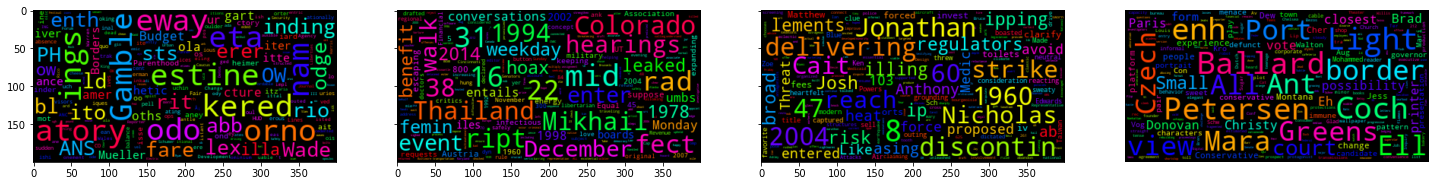

In [26]:
topk_insight.analyse_text(sample_articles_list, filters="stopwords")

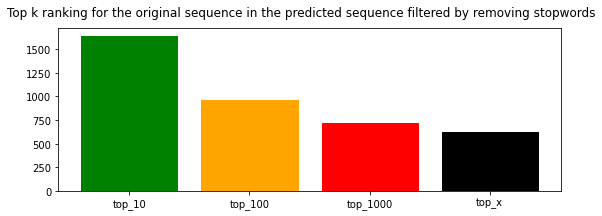

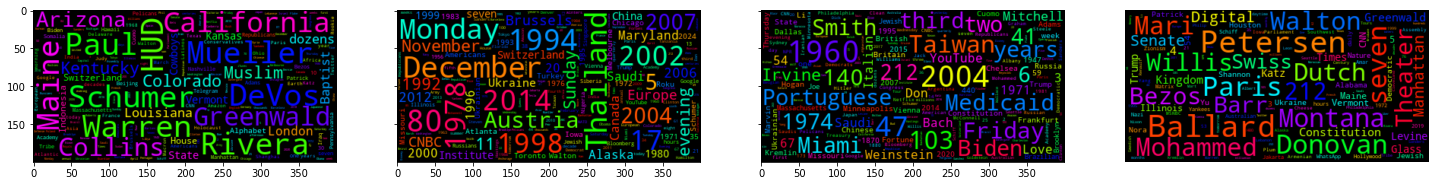

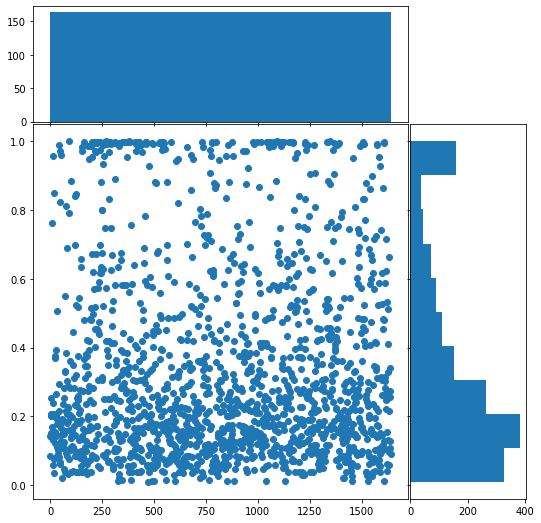

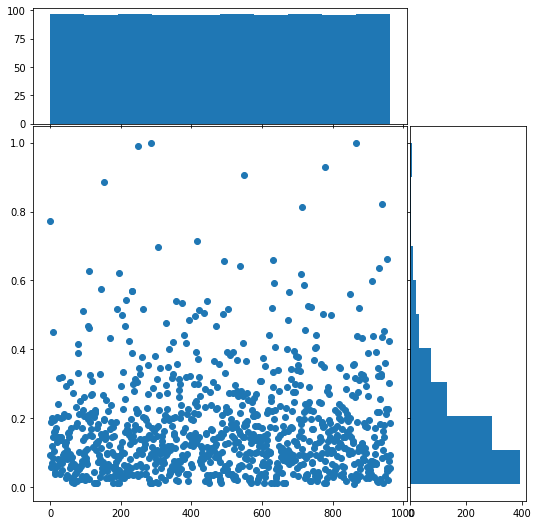

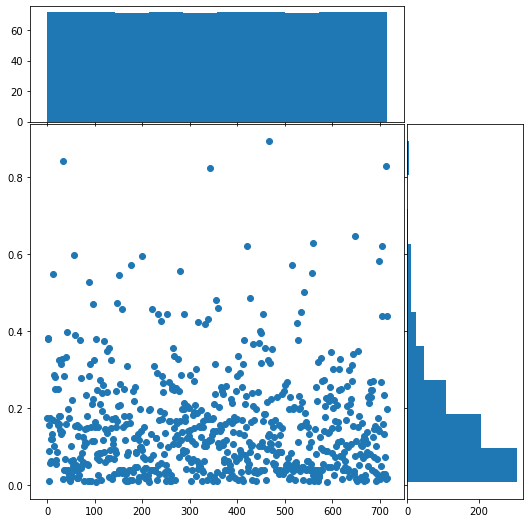

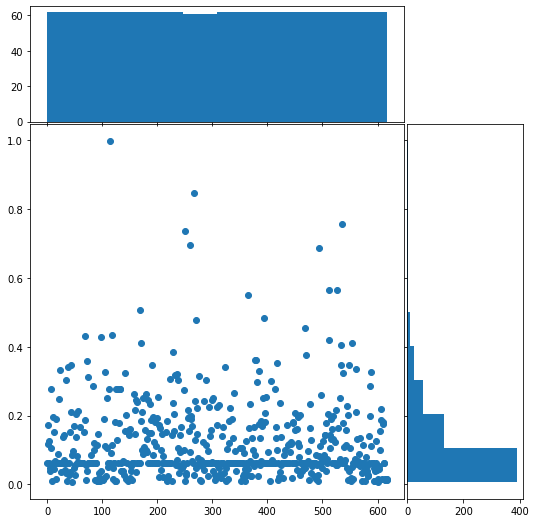

In [27]:
topk_insight.analyse_text(sample_articles_list, filters="ents", probs_plot=True)

In [ ]:
# for tokens which didn't come to top_10, analyse how confident is the model predicting it's next word.

In [ ]:
#topk_insight.analyse_text(sample_articles_list, filters="ents", probs_plot=True)

In [28]:
word_count = 0
for article in sample_articles_list:
    word_count += len(article.split(' '))

print("average Words in a document: ", word_count/len(sample_articles_list))

average Words in a document:  696.070707070707
